1. to load data and generate graph for CMSP trending
2. to load data and generate graph for Remedy Ticket Trending
5. Exit


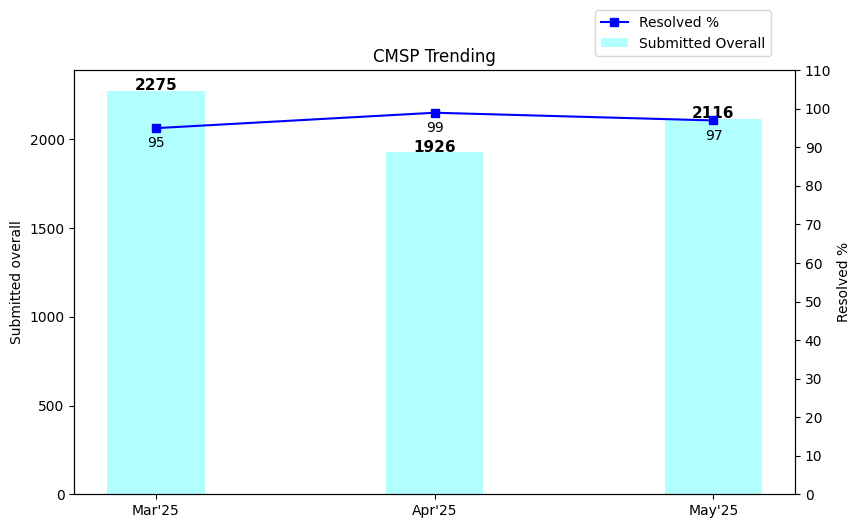

1. to load data and generate graph for CMSP trending
2. to load data and generate graph for Remedy Ticket Trending
5. Exit
Exiting the program.


In [ ]:

def generate_combo(a,b):
            
            import numpy as np
            import matplotlib.pyplot as plt
            import seaborn as sns
            import datetime as dt
            from sklearn.preprocessing import MinMaxScaler
            exclude_months = ["Oct'24", "Nov'24", "Dec'24", "Jan'25", "Feb'25"] #Exclusion List include the month you do not want to visualize
            mask = ~a.index.isin(exclude_months)
            fig, ax1 = plt.subplots(figsize=(10, 5))
            bar_width=0.35
            bars=ax1.bar(a.index[mask], a['Submitted Overall'][mask],bar_width,alpha=0.3, color='aqua', label='Submitted Overall')
            ax1.set_ylabel('Submitted overall')
            ax1.tick_params(axis='y')
            ax2 = ax1.twinx()
            ax2.plot(a.index[mask],a['Resolved Percentage'][mask],label='Resolved %',marker='s',color='blue')
            ax2.set_ylabel('Resolved %')
            ax2.tick_params(axis='y')
            ax2.set_yticks(np.arange(0, 120, 10))
            for x, y in zip(a.index[mask], a['Submitted Overall'][mask]):
                ax1.text(x, y + 3, str(y), ha='center', fontsize=11, fontweight='bold')

            for x, y in zip(a.index[mask], a['Resolved Percentage'][mask]):
                ax2.text(x, y -5, str(y), ha='center', fontsize=10)

            plt.title(b)
            plt.xticks(rotation=45, ha='right')
            plt.grid(False)
            lines_labels = [ax2.get_lines()[0], bars]
            labels = ['Resolved %', 'Submitted Overall']
            fig.legend(lines_labels, labels,
                    loc='center left',
                    bbox_to_anchor=(0.6, 1.0),
                    borderaxespad=0., fontsize=10)
            plt.tight_layout()
            plt.subplots_adjust(right=0.8)
            plt.show()


def main():
    
    while True:
        import pandas as pd
        print("1. to load data and generate graph for CMSP trending")
        print("2. to load data and generate graph for Remedy Ticket Trending")
        print("3. to load data and generate graph for CMSP Region Wise Trending")
        print("4. to load data and generate graph for Remedy Region Wise Trending")
        print("9. Exit")
        choice=input('choose options from above')


        if choice=="1":
            #Load Data for CMSP trending from MSR master sheet
            data1=pd.read_excel(r'https://github.com/roypromit/MSR/blob/main/MSR_Data.xlsx', sheet_name='CMSP Trending')
            df1=pd.DataFrame(data1)

            #Segregating the overall data
            df1['Month_dt'] = pd.to_datetime(df1['Month'], format="%b'%y")
            cmsp_trending = df1.groupby('Month_dt')[['Submitted Overall', 'Resolved Percentage',]].sum()
            cmsp_trending.index = cmsp_trending.index.strftime("%b'%y")

            #generate plot
            generate_combo(cmsp_trending,"CMSP Trending")
        
        elif choice=="2":
            #Load Data for CMSP trending from MSR master sheet
            data2=pd.read_excel(r'https://github.com/roypromit/MSR/blob/main/MSR_Data.xlsx', sheet_name='Remedy Ticket Trending')
            df2=pd.DataFrame(data2)
            
            #Segregating the overall data
            df2['Month_dt'] = pd.to_datetime(df2['Month'], format="%b'%y")
            remedy_trending = df2.groupby('Month_dt')[['Submitted Overall', 'Resolved Percentage',]].sum()
            remedy_trending.index = remedy_trending.index.strftime("%b'%y")
            #generate plot
            generate_combo(remedy_trending,"Remedy Ticket Trending")

        elif choice=='9':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
        

            

